In [8]:
import math

import numpy as np
import matplotlib.pyplot as plt

import efficient_bennett as eb

from tueplots import bundles
plt.rcParams.update(bundles.neurips2022())
FIGSIZE = [5.5, 3.399186938124422]

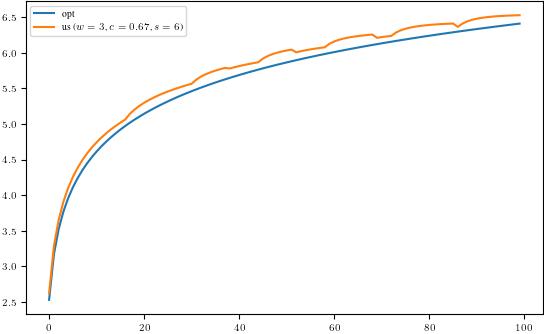

In [9]:
n = 100
B = eb.bennett_matrix(n)

w = 3
c = 1 - 1 / w
L, R, our_space = eb.approx_bennett_mm(n, c=c, w=w)

our_variance = eb.get_variance(L, R)
opt_variance = eb.get_variance(B, B)

t = np.arange(n)
plt.figure()
plt.plot(t, opt_variance, label='opt')
# plt.plot(t, amir_variance, label=f'amir (space={amir_space})')
plt.plot(t, our_variance, label=f'us ($w={w}$, $c={c:.2f}$, $s={our_space}$)')
plt.legend()
plt.savefig('plots/test.pdf')
plt.show()

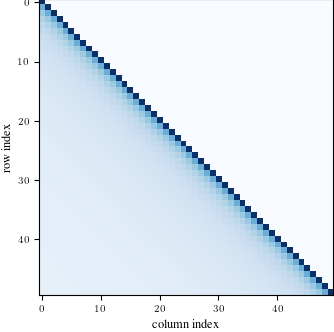

In [22]:
n = 50
B = eb.bennett_matrix(n)
plt.figure(figsize=(FIGSIZE[1], FIGSIZE[1]))
# plt.title("Bennett'77 matrix")
plt.imshow(B, cmap='Blues', interpolation='nearest')
plt.xlabel('column index')
plt.ylabel('row index')
plt.savefig('plots/show_bennett.pdf')
plt.show()

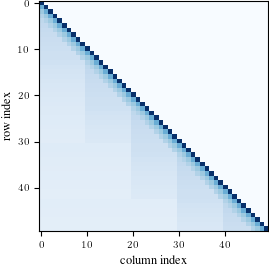

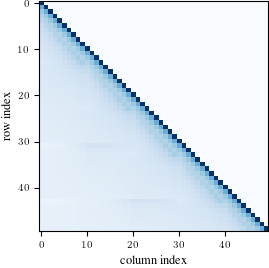

In [29]:
n = 50
w = 4
c = 1 - 1/w
L, R, our_space = eb.approx_bennett_mm(n, c=c, w=w)
plt.figure(figsize=(FIGSIZE[0]/2, FIGSIZE[0]/2))
plt.imshow(L, cmap='Blues', interpolation='nearest')
plt.xlabel('column index')
plt.ylabel('row index')
plt.savefig('plots/L_matrix_2x.pdf')
plt.show()
plt.figure(figsize=(FIGSIZE[0]/2, FIGSIZE[0]/2))
plt.imshow(R, cmap='Blues', interpolation='nearest')
plt.xlabel('column index')
plt.ylabel('row index')
plt.savefig('plots/R_matrix_2x.pdf')
plt.show()


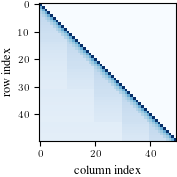

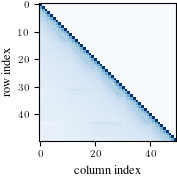

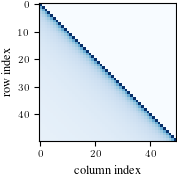

Our approximation: 0.998867779688902 in space 7
Our sensitivity blow-up: 1.0017068938078533
Our Frobenius-norm blow-up: 0.9977307091439768
[[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


In [42]:
n = 50
w = 4
c = 1 - 1/w
shrink_factor = 3
L, R, our_space = eb.approx_bennett_mm(n, c=c, w=w)
plt.figure(figsize=(FIGSIZE[0]/shrink_factor, FIGSIZE[0]/shrink_factor))
plt.imshow(L, cmap='Blues', interpolation='nearest')
plt.xlabel('column index')
plt.ylabel('row index')
plt.savefig('plots/L_matrix_3x.pdf')
plt.show()
plt.figure(figsize=(FIGSIZE[0]/shrink_factor, FIGSIZE[0]/shrink_factor))
plt.imshow(R, cmap='Blues', interpolation='nearest')
plt.xlabel('column index')
plt.ylabel('row index')
plt.savefig('plots/R_matrix_3x.pdf')
plt.show()
B = eb.bennett_matrix(n)
plt.figure(figsize=(FIGSIZE[0]/shrink_factor, FIGSIZE[0]/shrink_factor))
plt.imshow(B, cmap='Blues', interpolation='nearest')
plt.xlabel('column index')
plt.ylabel('row index')
plt.savefig('plots/bennet_matrix_3x.pdf')
plt.show()

print(f"Our approximation: {eb.get_mse(L, R) / eb.get_mse(B, B)} in space {our_space}")

r_column_norms = np.linalg.norm(R, axis=0)
b_column_norms = np.linalg.norm(B, axis=0)

print(f"Our sensitivity blow-up: {r_column_norms.max() / b_column_norms.max()}")
print(f"Our Frobenius-norm blow-up: {np.linalg.norm(L, ord='fro') / np.linalg.norm(B, ord='fro')}")

print(L @ R)

In [47]:
B @ B

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.]])

Our approximation: 0.9999657846518007 in space 51
Our sensitivity blow-up: 1.0001858832469916
Our Frobenius-norm blow-up: 0.999797046652873


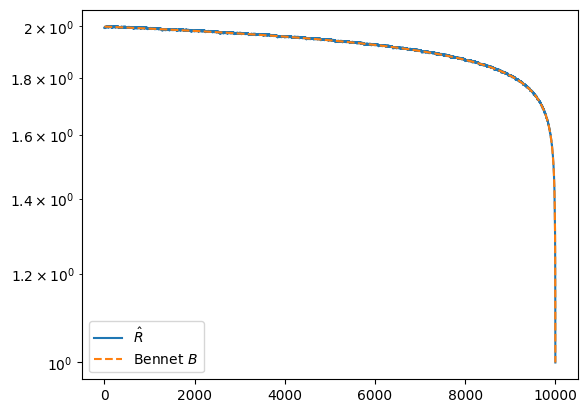

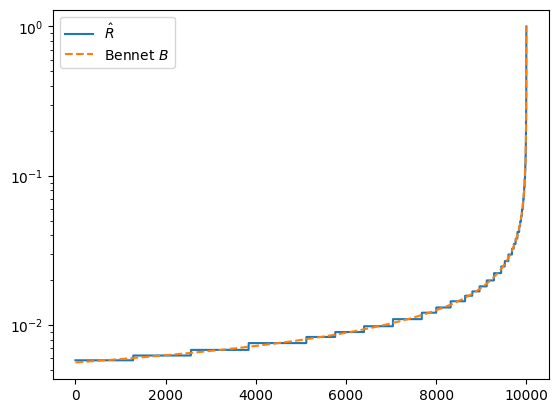

In [49]:
n = 10000
w = 15
c = 1 - 1/w
B = eb.bennett_matrix(n)
L, R, our_space = eb.approx_bennett_mm(n, c=c, w=w)

print(f"Our approximation: {eb.get_mse(L, R) / eb.get_mse(B, B)} in space {our_space}")

r_column_norms = np.linalg.norm(R, axis=0)
b_column_norms = np.linalg.norm(B, axis=0)


print(f"Our sensitivity blow-up: {r_column_norms.max() / b_column_norms.max()}")
print(f"Our Frobenius-norm blow-up: {np.linalg.norm(L, ord='fro') / np.linalg.norm(B, ord='fro')}")


indices = np.arange(n)

plt.figure()
plt.plot(indices, r_column_norms, label='$\hat{R}$')
plt.plot(indices, b_column_norms, ls='--', label='Bennet $B$')
plt.legend()
plt.yscale('log')
plt.show()


plt.figure()
plt.plot(indices, L[-1, :], label='$\hat{L}$')
plt.plot(indices, B[-1, :], ls='--', label='Bennet $B$')
# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

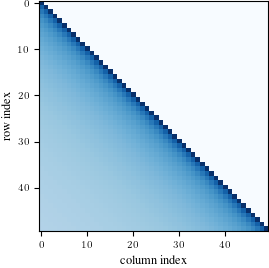

4


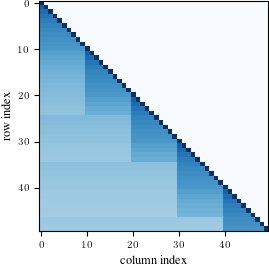

In [91]:
n = 50
w = 1
c = 0.77
shrink_factor = 2

A = eb.scipy.linalg.toeplitz(np.power(np.arange(1, n+1).astype(float), -0.3), [1] + [0] * (n - 1))
plt.figure(figsize=(FIGSIZE[0]/shrink_factor, FIGSIZE[0]/shrink_factor))
plt.imshow(A, cmap='Blues')
plt.xlabel('column index')
plt.ylabel('row index')
plt.savefig('plots/unbinned_matrix_2x.pdf')
plt.show()

A_binned, space = eb.approx_matrix(A, c=c, w=w)
print(space)

plt.figure(figsize=(FIGSIZE[0]/shrink_factor, FIGSIZE[0]/shrink_factor))
plt.imshow(A_binned, cmap='Blues')
plt.xlabel('column index')
plt.ylabel('row index')
plt.savefig('plots/binned_matrix_2x.pdf')
plt.show()


In [ ]:
plt.figure()
plt.title("Bennett'77 matrix")
plt.imshow(B, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.figure()
plt.title('Our L')
plt.imshow(L_our, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()
plt.figure()
plt.title('Our Perturabation of L')
P = L_our - B
norm = mcolors.TwoSlopeNorm(vmin=P.min(), vcenter=0, vmax = P.max())
plt.imshow(P, cmap='RdBu', interpolation='nearest', norm=norm)
plt.colorbar()
plt.show()
plt.figure()
plt.title('Our R')
plt.imshow(R_our, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()
plt.figure()
plt.title('Our Perturbation of R')
P = R_our - B
norm = mcolors.TwoSlopeNorm(vmin=P.min(), vcenter=0, vmax = P.max())
plt.imshow(P, cmap='RdBu', interpolation='nearest', norm=norm)
plt.colorbar()
plt.show()
plt.title('Amir L')
plt.imshow(L_amir, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()
plt.title('Amir R')
plt.imshow(R_amir, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()